In [99]:
"""
Training/Validation/Testing
│
└─── 00000
│   │
│   └─── FLAIR
│   │   │ Image.nii.gz
│   │   
│   └─── T1
│   │   │ Image.nii.gz
│   │   
│   └─── T1CE
│   │   │ Image.nii.gz
│   │   
│   └─── T2
│   │   │ Image.nii.gz
|   |   
|   |___ Segmentation
|   |   | Image.nii.gz
│   
└─── 00001
│
│ ... 
│ ...   
│   
└─── 00002
"""

"""
next steps:
- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)
- view an image - look into: can you have multiple windows for MRIcro
- also look at the viewer thing in colab

then i can do preprocessing
"""

'\nnext steps:\n- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)\n- view an image - look into: can you have multiple windows for MRIcro\n- also look at the viewer thing in colab\n\nthen i can do preprocessing\n'

In [4]:
!gdown --id 17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt
To: /content/brats_120_images.zip
100% 235M/235M [00:01<00:00, 195MB/s]


In [5]:
!unzip /content/brats_120_images.zip

Archive:  /content/brats_120_images.zip
   creating: brats_120_images/
  inflating: brats_120_images/BraTS2021_00025_seg.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_seg.nii  
  inflating: brats_120_images/BraTS2021_00025_t2.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_t2.nii  
  inflating: brats_120_images/BraTS2021_00000_t1ce.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00000_t1ce.nii  
  inflating: brats_120_images/BraTS2021_00025_t1.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00025_t1.nii  
  inflating: brats_120_images/BraTS2021_00032_flair.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00032_flair.nii  
  inflating: brats_120_images/BraTS2021_00003_seg.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00003_seg.nii  
  inflating: brats_120_images/BraTS2021_00026_flair.nii  
  inflating: __MACOSX/brats_120_images/._BraTS2021_00026_flair.nii  
  inflating: brats_120_images/BraTS2021_00011_t1.nii  
  infla

In [32]:
import glob
"""
glob.glob
you can have a function for retrieving the file paths by having a variable for each of the volumes + segmented
e.x. for a segmentation file:
"/Users/shizacharania/Desktop/brats_data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000_seg.nii"
then you would look for the "BraTS2021_" in the beginning and the "*/*" stuff and then the "_seg.nii" (the extracted nifti files dont have ".gz")
"""

flair_paths = glob.glob("*/*_flair.nii")
flair_paths = sorted(flair_paths)
print(flair_paths)
print(len(flair_paths))

t1_paths = glob.glob("*/*_t1.nii")
t1_paths = sorted(t1_paths)
print(t1_paths)
print(len(t1_paths))

t1ce_paths = glob.glob("*/*_t1ce.nii")
t1ce_paths = sorted(t1ce_paths)
print(t1ce_paths)
print(len(t1ce_paths))

t2_paths = glob.glob("*/*_t2.nii")
t2_paths = sorted(t2_paths)
print(t2_paths)
print(len(t2_paths))

seg_paths = glob.glob("*/*_seg.nii")
seg_paths = sorted(seg_paths)
print(seg_paths)
print(len(seg_paths))

all = glob.glob("*/*.nii")
print(24*5==len(all))

['brats_120_images/BraTS2021_00000_flair.nii', 'brats_120_images/BraTS2021_00002_flair.nii', 'brats_120_images/BraTS2021_00003_flair.nii', 'brats_120_images/BraTS2021_00005_flair.nii', 'brats_120_images/BraTS2021_00006_flair.nii', 'brats_120_images/BraTS2021_00008_flair.nii', 'brats_120_images/BraTS2021_00009_flair.nii', 'brats_120_images/BraTS2021_00011_flair.nii', 'brats_120_images/BraTS2021_00012_flair.nii', 'brats_120_images/BraTS2021_00014_flair.nii', 'brats_120_images/BraTS2021_00016_flair.nii', 'brats_120_images/BraTS2021_00017_flair.nii', 'brats_120_images/BraTS2021_00018_flair.nii', 'brats_120_images/BraTS2021_00019_flair.nii', 'brats_120_images/BraTS2021_00020_flair.nii', 'brats_120_images/BraTS2021_00021_flair.nii', 'brats_120_images/BraTS2021_00022_flair.nii', 'brats_120_images/BraTS2021_00024_flair.nii', 'brats_120_images/BraTS2021_00025_flair.nii', 'brats_120_images/BraTS2021_00026_flair.nii', 'brats_120_images/BraTS2021_00028_flair.nii', 'brats_120_images/BraTS2021_00030

In [33]:
# /content/brats_data_992/BraTS2021_00275_flair.nii
for i in range(len(flair_paths)):
  flair_paths[i] = "/content/" + flair_paths[i]

for i in range(len(t1_paths)):
  t1_paths[i] = "/content/" + t1_paths[i]

for i in range(len(t1ce_paths)):
  t1ce_paths[i] = "/content/" + t1ce_paths[i]

for i in range(len(t2_paths)):
  t2_paths[i] = "/content/" + t2_paths[i]

for i in range(len(seg_paths)):
  seg_paths[i] = "/content/" + seg_paths[i]

print(flair_paths[0])
print(t1_paths[0])
print(t1ce_paths[0])
print(t2_paths[0])
print(seg_paths[0])

/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00000_seg.nii


In [34]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [35]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import SimpleITK as sitk

In [37]:
# reading a file in simpleitk (sitk)

flair_nparrays = []
t1_nparrays = []
t1ce_nparrays = []
t2_nparrays = []
seg_nparrays = []

for flair_imagepath in flair_paths:
  img = sitk.ReadImage(flair_imagepath)
  img = sitk.GetArrayFromImage(img)
  flair_nparrays.append(img)

for t1_imagepath in t1_paths:
  img = sitk.ReadImage(t1_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1_nparrays.append(img)

for t1ce_imagepath in t1ce_paths:
  img = sitk.ReadImage(t1ce_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1ce_nparrays.append(img)

for t2_imagepath in t2_paths:
  img = sitk.ReadImage(t2_imagepath)
  img = sitk.GetArrayFromImage(img)
  t2_nparrays.append(img)

for seg_imagepath in seg_paths:
  img = sitk.ReadImage(seg_imagepath)
  img = sitk.GetArrayFromImage(img)
  seg_nparrays.append(img)

In [97]:
print(len(flair_nparrays))
print(len(t1_nparrays))
print(len(t1ce_nparrays))
print(len(t2_nparrays))
print(len(seg_nparrays))

24
24
24
24
24


In [96]:
# i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that

import matplotlib.pyplot as plt
import numpy

In [41]:
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

# I'll do this part by myself after

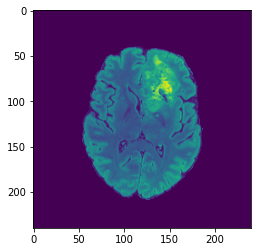

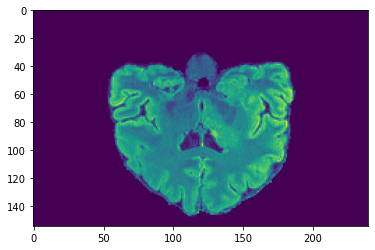

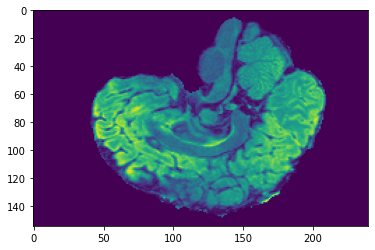

In [95]:
# axial
brain_slice = flair_nparrays[0][77, :, :] # changing Z from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice)
plt.show()

# sagittal
brain_slice = flair_nparrays[0][:, 120, :] # changing X from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice)
plt.show()

# coronal
brain_slice = flair_nparrays[0][:, :, 120] # changing Y from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice)
plt.show()

Flair Example:
/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00002_flair.nii
/content/brats_120_images/BraTS2021_00003_flair.nii
/content/brats_120_images/BraTS2021_00005_flair.nii
/content/brats_120_images/BraTS2021_00006_flair.nii
/content/brats_120_images/BraTS2021_00008_flair.nii
/content/brats_120_images/BraTS2021_00009_flair.nii
/content/brats_120_images/BraTS2021_00011_flair.nii
/content/brats_120_images/BraTS2021_00012_flair.nii
/content/brats_120_images/BraTS2021_00014_flair.nii


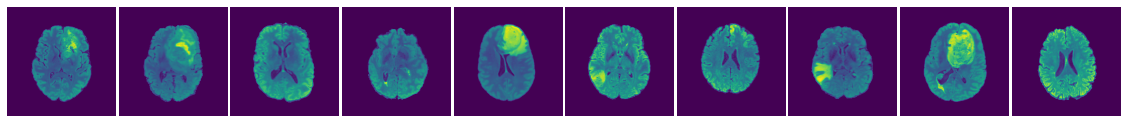

In [43]:
slice_num = 77 # 155/2 = approx. 77
nrows = 10
ncols = 10

plt.figure(figsize=(20,20))

print("Flair Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(flair_paths[i])
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :])
plt.show()

T1 Example:
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00002_t1.nii
/content/brats_120_images/BraTS2021_00003_t1.nii
/content/brats_120_images/BraTS2021_00005_t1.nii
/content/brats_120_images/BraTS2021_00006_t1.nii
/content/brats_120_images/BraTS2021_00008_t1.nii
/content/brats_120_images/BraTS2021_00009_t1.nii
/content/brats_120_images/BraTS2021_00011_t1.nii
/content/brats_120_images/BraTS2021_00012_t1.nii
/content/brats_120_images/BraTS2021_00014_t1.nii


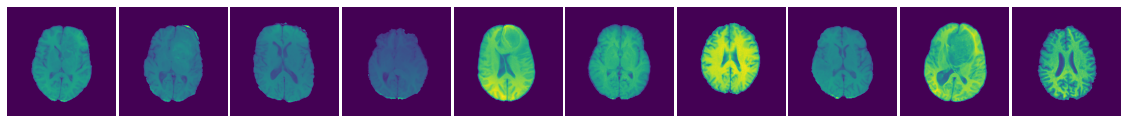

In [44]:
plt.figure(figsize=(20,20))

print("T1 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1_paths[i])
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :])
plt.show()

T1CE Example:
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00002_t1ce.nii
/content/brats_120_images/BraTS2021_00003_t1ce.nii
/content/brats_120_images/BraTS2021_00005_t1ce.nii
/content/brats_120_images/BraTS2021_00006_t1ce.nii
/content/brats_120_images/BraTS2021_00008_t1ce.nii
/content/brats_120_images/BraTS2021_00009_t1ce.nii
/content/brats_120_images/BraTS2021_00011_t1ce.nii
/content/brats_120_images/BraTS2021_00012_t1ce.nii
/content/brats_120_images/BraTS2021_00014_t1ce.nii


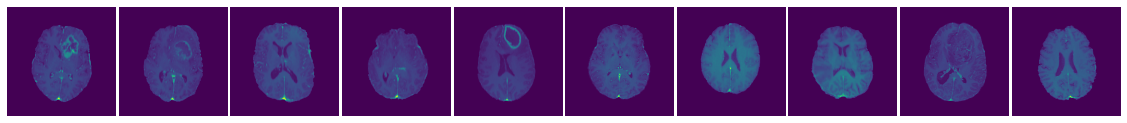

In [45]:
plt.figure(figsize=(20,20))

print("T1CE Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1ce_paths[i])
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :])
plt.show()

T2 Example:
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00002_t2.nii
/content/brats_120_images/BraTS2021_00003_t2.nii
/content/brats_120_images/BraTS2021_00005_t2.nii
/content/brats_120_images/BraTS2021_00006_t2.nii
/content/brats_120_images/BraTS2021_00008_t2.nii
/content/brats_120_images/BraTS2021_00009_t2.nii
/content/brats_120_images/BraTS2021_00011_t2.nii
/content/brats_120_images/BraTS2021_00012_t2.nii
/content/brats_120_images/BraTS2021_00014_t2.nii


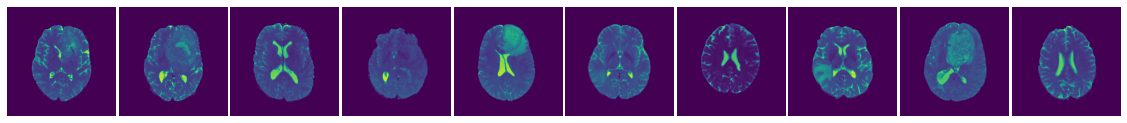

In [46]:
plt.figure(figsize=(20,20))

print("T2 Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t2_paths[i])
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :])
plt.show()

Segmentations Example:
/content/brats_120_images/BraTS2021_00000_seg.nii
/content/brats_120_images/BraTS2021_00002_seg.nii
/content/brats_120_images/BraTS2021_00003_seg.nii
/content/brats_120_images/BraTS2021_00005_seg.nii
/content/brats_120_images/BraTS2021_00006_seg.nii
/content/brats_120_images/BraTS2021_00008_seg.nii
/content/brats_120_images/BraTS2021_00009_seg.nii
/content/brats_120_images/BraTS2021_00011_seg.nii
/content/brats_120_images/BraTS2021_00012_seg.nii
/content/brats_120_images/BraTS2021_00014_seg.nii


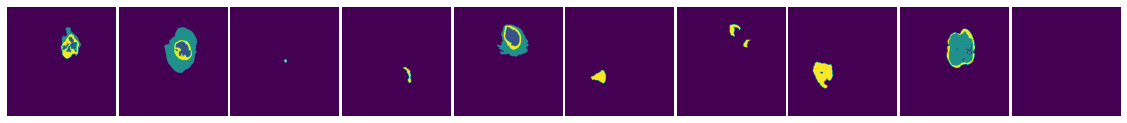

In [47]:
plt.figure(figsize=(20,20))

print("Segmentations Example:")
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(seg_paths[i])
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :])
plt.show()

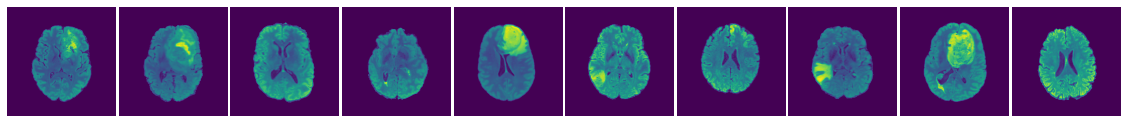

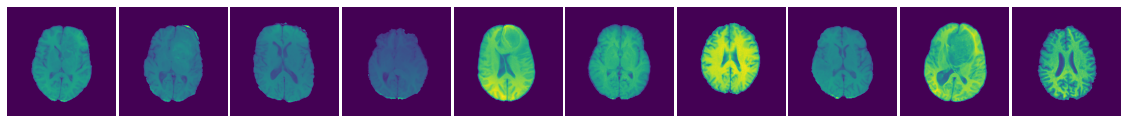

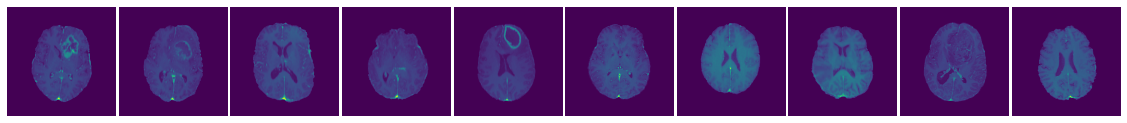

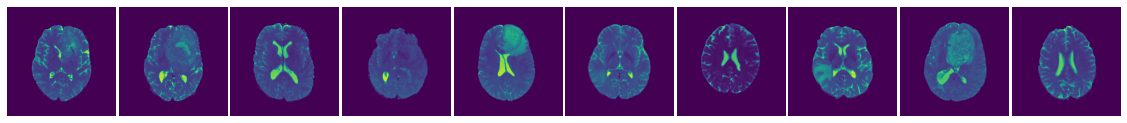

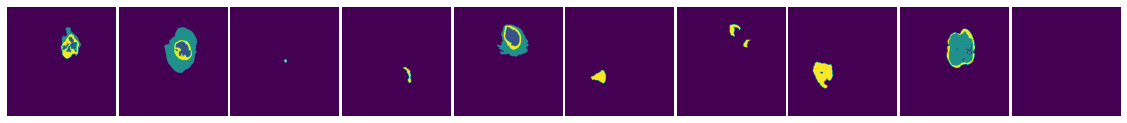

In [100]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :])
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :])
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :])
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :])
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :])
plt.show()

# Current Steps
* Build scrolling feature to visualizing going through the brain slices (user’s POV)
*   Understand how the data (especially with the 4 modalities) will be inputted into the segmentation model
*   Try to understand inconsistency with the std values of the volumes



In [54]:
import numpy as np

images_arrays = flair_nparrays+t1_nparrays+t1ce_nparrays+t2_nparrays
seg_arrays = np.array(seg_nparrays, dtype=np.float32)
print(len(images_arrays))
print(len(seg_arrays))

96
24


In [55]:
import math
import numpy as np
import cv2
import torch
from torchvision import transforms

In [56]:
def find_mean(volume):
  total_pixels = 155*240*240
  pixels_sum = 0
  # print(volume.shape)
  for i in range(155):
    current_slice = volume[i, :, :] # got the current slice
    current_slice_sum = current_slice.sum() # take sum of each slice
    # print(current_sum/256/256)
    pixels_sum += current_slice_sum # add the sum of all the slices
  # print(pixels_sum, total_pixels)
  return pixels_sum/total_pixels

In [57]:
print(find_mean(images_arrays[2]))
print(np.mean(images_arrays[2]))

201.3437311827957
201.3437311827957


In [58]:
total_mean = 0
for i in images_arrays:
  total_mean += find_mean(i)
mean = total_mean/len(images_arrays)
print(mean)
print(np.mean(images_arrays))

203.51977224625708
203.5197722462571


In [73]:
def find_std(volume):
  total_pixels = 155*240*240
  squared_sum_error = 0
  # print(volume.shape)
  for i in range(155):
    current_slice = volume[i, :, :] # got the current slice
    squared_sum_error += ((current_slice-mean)**2).sum()
  return math.sqrt(squared_sum_error/total_pixels)

In [80]:
print(find_std(images_arrays[3]))
print(np.std(images_arrays[3]))

491.8558385226537
491.5317922359887


In [77]:
total_std1 = 0
for i in images_arrays:
  total_std1 += find_std(i)
std = total_std1/len(images_arrays)
print(std)

total_std2 = 0
for i in images_arrays:
  total_std2 += np.std(i)
npstd = total_std2/len(images_arrays)
print(npstd)

501.5261090747172
487.13169886539225


In [81]:
print("Mean: " + str(mean) + " ----- " + "Standard Deviation: " + str(std))

Mean: 203.51977224625708 ----- Standard Deviation: 501.5261090747172


# Next Steps
*   Read some more preprocessing papers to see if something new comes up with preprocessing steps
*   Preprocessing code
* Read model papers